# Step 0: Importing the libraries

In [12]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Defining the area

In [101]:
center_x = 0
center_y = 0
center_z = 0

radius  = 5000

print("Total area is = " + str(radius*radius*math.pi))

Total area is = 78539816.33974482


# Step 2: FSS class

In [102]:
# Creating the FSS class
class FSS:
  def __init__(self, FSS_x, FSS_y, FSS_z):
    self.FSS_x = FSS_x
    self.FSS_y = FSS_y
    self.FSS_z = FSS_z


  def FSS_co_ordinate(self):
    print("Co-ordinate of FSS is = " + str(self.FSS_x) + "," + str(self.FSS_y) + "," + str(self.FSS_z))
    

    
# Creating an FSS object
fss1 = FSS(0,0,0)
fss1.FSS_co_ordinate()

Co-ordinate of FSS is = 0,0,0


# Step 3: BS Class

Bs Co-ordinates=-1181.269432750376,2414.966864904689,35
Path Loss for UMi = 525.4312893864284
Path Loss for UMa = 536.6968600587137
Path Loss for RMa = 413.32237632910864
Bs Co-ordinates=-2209.400683748676,-1605.9075157354855,23
Path Loss for UMi = 484.12170982482553
Path Loss for UMa = 490.7848323276908
Path Loss for RMa = 394.2075695053879
Bs Co-ordinates=-3269.73201496524,-2004.6435724522414,14
Path Loss for UMi = 495.1101416911497
Path Loss for UMa = 503.01475478267304
Path Loss for RMa = 395.7862682909023
Bs Co-ordinates=-1376.5759215202265,-1548.8776563015203,6
Path Loss for UMi = 477.7359705475522
Path Loss for UMa = 483.669878921146
Path Loss for RMa = 394.07547302720553


UE Co-ordinates=2416.7150432014673,1665.9665093376007,1.4677345351474085
Path Loss for UMi = 522.9145861852719
Path Loss for UMa = 533.903939960842
Path Loss for RMa = 411.2460373793034
UE Co-ordinates=-831.6738474732479,-3273.294948849536,1.0080029746415324
Path Loss for UMi = 487.1467073787255
Path Loss for

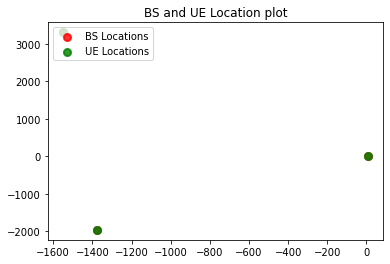

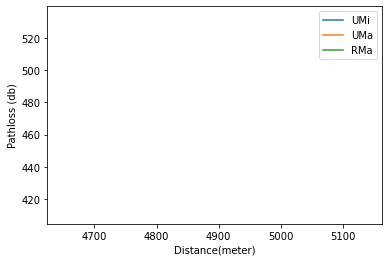

In [159]:
class BS:
  def __init__(self, radius, max_height, carr_freq):
    self.radius = radius
    self.max_height = max_height
    self.carr_freq = carr_freq

  def BS_random_co_ordinates(self):

    BS_x = random.randint(-4000,4000) + 1000*random.random()
    BS_y = random.randint(-4000,4000) + 1000*random.random()
    BS_z = random.randint(0,35)
    
    return BS_x, BS_y, BS_z
 
  def UE_random_co_ordinates(self):
    UE_x = random.randint(-4000,4000) + 1000*random.random()
    UE_y = random.randint(-4000,4000) + 1000*random.random()
    UE_z = random.uniform (0,1.5)
    
    return UE_x, UE_y, UE_z
   
    
  def path_loss_UMi(self):
##UMi
##LOS,SF=4:

##(10m<=d_2D)<=D_BP:
    h=5
    d_2D=math.sqrt(((BS_x-UE_x)**2)+((BS_y- UE_y)**2)+((BS_z-UE_z)**2))
    hBs=10
    fc=12e3
    d_3D=math.sqrt(hBs**2+d_2D**2)
    PL1umi=32.4+21*math.log(d_3D)+20*math.log(fc)
    
##(D_BP<=d_2D)<=5000m:
    hBs=10
    hUT=1.5
    hE=1
    hBs1=hBs-hE
    hUT1=hUT-hE
    c=3*10**8
    D_BP= (4*hBs1*hUT1*fc)/c
    PL2umi=32.4+40*math.log(d_3D)+20*math.log(fc)-9.5*math.log((D_BP)**2+(hBs-hUT)**2)
    
    if 10 <=d_2D and d_2D<=D_BP:
        PLUMiLOS=PL1umi
    elif D_BP<=d_2D and  d_2D<=5000:
        PLUMiLOS= PL2umi  
    else:
        PLUMiLOS=1

##NLOS,SF=7.82:
    PL1umiNLOS= 35.3*math.log(d_3D)+22.4+21.3*math.log(fc)-0.3*(hUT-1.5)
    PLUMiNLOS= max(PL2umi,PL1umiNLOS)
    
##Loss Probability:
##d_2D <=18m, PrLOS=1

##18m<d_2D:
    PrLosUmi=(18/d_2D)+math.exp((-(d_2D/36))*(1-(18/d_2D)))
    
##path_loss 
    path_loss_UMi= PL2umi*PrLosUmi+PL1umiNLOS*(1-PrLosUmi)
    
    return path_loss_UMi

  def path_loss_UMa(self):
##LOS,SF=4:
##(10m<=d_2D)<=D_BP:
    fc=12e3
    h=5
    d_2D=math.sqrt(((BS_x-UE_x)**2)+((BS_y- UE_y)**2)+((BS_z-UE_z)**2))
    hBs=25
    d_3D=math.sqrt(hBs**2+d_2D**2)
    PL3uma=28.0+22*math.log(d_3D)+20*math.log(fc)
    
##(D_BP<=d_2D) <=5000m:
    hUT=1.5
    hE=1
    hBs1=hBs-hE
    hUT1=hUT-hE
    c=3*10**8
    D_BP= (4*hBs1*hUT1*fc)/c
    PL4uma=28.0+40*math.log(d_3D)+20*math.log(fc)-9*math.log((D_BP)**2+(hBs-hUT)**2)
    
    if 10 <=d_2D and d_2D<=D_BP:
        PLUMALOS=PL3uma
    elif D_BP<=d_2D and  d_2D<=5000:
        PLUMALOS= PL4uma  
    else:
        PLUMALOS=1
        
##NLOS,SF=6:
    PL1NLOSuma=13.54+39.08*math.log(d_3D)+20*math.log(fc)-0.6*(hUT-1.5)
    PLUMANLOS=max(PL4uma,PL1NLOSuma)

##NLOS,SF=7.8 (optional)
##PL_Optional=32.4+20*math.log(fc)+30*math.log(d_3D)

##Loss Probability:
##if d_2D <=18m then PrLOS=1.
##18m<d_2D:
## if hUT<=13m then ChUT=0, and if (13m< hUT<=23m),then ChUT=((hUT-13)/10).^1.5
    ChUT=0
    PrLOSUma=((18/d_2D)+math.exp((-(d_2D/63))*(1-(18/d_2D))))*(1+ChUT*(5/4)*((d_2D/100)**3)*math.exp(-(d_2D/150)))

##Path Loss
    path_loss_UMa= PL4uma*PrLOSUma+PL1NLOSuma*(1-PrLOSUma)
    return path_loss_UMa
  
  def path_loss_RMa(self):
##LOS,SF=4(PL1),SF=6(PL2)
##10m<=d_2D<=d_BP: 
    fc=12e3
    h=5
    d_2D=math.sqrt(((BS_x-UE_x)**2)+((BS_y- UE_y)**2)+((BS_z-UE_z)**2))
    hBs=35
    d_3D= math.sqrt(hBs**2+d_2D**2)
    PL1rma=20*math.log((40*math.pi*d_3D*fc)/3)+ min(0.03*h**1.72,10)*math.log(d_3D)-min(0.044*h**1.72,14.77)+0.002*math.log(h)*d_3D
    
##d_BP<=d_2D<=10km:
    hUT=1.5
    c=3*10**8
    d_BP= (2*math.pi*hBs*hUT*fc)/c
    PL2rma= PL1rma*(d_BP)+40*math.log(d_3D/d_BP)

    if 10<=d_2D and d_2D <=d_BP:
        PLRMALOS=PL1rma
    elif d_BP<=d_2D and d_2D <=10000:
        PLRMALOS= PL2rma  
    else:
        PLUMALOS=1

##NLOS,SF=8:
    W=20
    h=5
    PL1NLOSrma= 161.04-7.11*math.log(W)+7.5*math.log(h)-(24.37-3.7*(h/hBs)**2)*math.log(hBs)+(43.42-3.1*math.log(hBs))*(math.log(d_3D)-3)+20*math.log(fc)-(3.2*(math.log(11.75*hUT))**2-4.97)
    PLRMANLOS=max(PL2rma,PL1NLOSrma)

##Loss Probability:
##if d_2D <=10m, PrLOS=1
## if 10m<d_2D:
    PrLOSrma=math.exp(-((d_2D-10)/1000))

##PathLoss:
    path_loss_RMa=PL2rma*PrLOSrma+PL1NLOSrma*(1-PrLOSrma)
    return path_loss_RMa




for i in range (4):
    bs1 = BS(radius, max_height=35, carr_freq=12e3)
    BS_x, BS_y, BS_z = bs1.BS_random_co_ordinates()
    print ("Bs Co-ordinates=" +str (BS_x)+ "," + str(BS_y)+ "," + str(BS_z))
    
    path_loss_UMi= bs1.path_loss_UMi()
    print ("Path Loss for UMi = " +str(path_loss_UMi))
    
    path_loss_UMa= bs1.path_loss_UMa()
    print ("Path Loss for UMa = " +str(path_loss_UMa))
    
    path_loss_RMa= bs1.path_loss_RMa()
    print ("Path Loss for RMa = " +str(path_loss_RMa))
     
    
print ("\n")
    
for i in range (10):
    ue1 = BS(radius, max_height=1.5, carr_freq=12e3)
    UE_x,  UE_y, UE_z = ue1.UE_random_co_ordinates()
    print("UE Co-ordinates=" +str (UE_x)+ "," + str(UE_y)+ "," + str(UE_z))
    
    path_loss_UMi= ue1.path_loss_UMi()
    print ("Path Loss for UMi = " +str(path_loss_UMi))
    
    path_loss_UMa= ue1.path_loss_UMa()
    print ("Path Loss for UMa = " +str(path_loss_UMa))
    
    path_loss_RMa= ue1.path_loss_RMa()
    print ("Path Loss for RMa = " +str(path_loss_RMa))

   
    
X1= np.asarray([BS_x, BS_y, BS_z])
Y1= np.asarray([UE_x, UE_y, UE_z])

data=X1,Y1
colors = ("red", "green")
groups = ("BS Locations", "UE Locations")


for data, color, group in zip(data, colors, groups):
      plt.scatter(X1,Y1, alpha=0.8, c=color, s=50, label=group, linewidths = 2,cmap="jet")
  
    
plt.title('BS and UE Location plot')
plt.legend(loc=2)
plt.show()

import matplotlib.pyplot as plt
d_2D=math.sqrt(((BS_x-UE_x)**2)+((BS_y- UE_y)**2)+((BS_z-UE_z)**2))
y1= path_loss_UMi
y2= path_loss_UMa
y3= path_loss_RMa
plt.plot (d_2D,y1, label='UMi')
plt.plot (d_2D,y2, label='UMa')
plt.plot (d_2D,y3, label='RMa')
plt.xlabel ('Distance(meter)')
plt.ylabel ('Pathloss (db)')
plt.legend()
plt.show()
    

In [145]:
##class UE:
  ##def __init__(self, radius, max_height):
    self.radius = radius
    self.max_height = max_height

  ##def BS_random_co_ordinates(self):

    random.seed(radius)
    print ("UE_x = ", random.randint(-4000,4000) + 1000*random.random())
    print ("UE_y = ", random.randint(-4000,4000) + 1000*random.random())
    
    print ("UE_z = ", random.randint(0,35))
    
    
# Creating an BS object
ue1 = UE(radius, max_height)
ue1.BS_random_co_ordinates()
plt.scatter(X,Y, s=radius*radius*math.pi, alpha=0.5 )
plt.xlabel ('BS Co-ordinates')
plt.ylabel ('UE co-ordinates')
plt.show()##




X1= np.asarray([BS_x, BS_y, BS_z])
Y1= np.asarray([UE_x, UE_y, UE_z])

data=X1,Y1
colors = ("red", "green")
groups = ("BS Locations", "UE Locations")


for data, color, group in zip(data, colors, groups):
      plt.scatter(X1,Y1, alpha=0.8, c=color, s=50, label=group, linewidths = 2,cmap="jet")
  
    
plt.title('BS and UE Location plot')
plt.legend(loc=2)
plt.show()

IndentationError: unexpected indent (1367946029.py, line 3)